In [1]:
#!pip install tqdm
import cv2
import numpy as np
from random import shuffle
import os
from tqdm import tqdm

TRAIN_DIR='C:/Users/nimra/Downloads/KAGGLE/train (1)/train'
TEST_DIR='C:/Users/nimra/Downloads/KAGGLE/test1 (1)/test1'
IMG_SIZE=50
LR=1e-3
MY_MODEL='dogvscats-{}-{}-model'.format(LR,'2conv-basic')

In [2]:
def label_image(img):
    word_label=img.split('.')[-3]
    if word_label=='cat':return [1,0]
    elif word_label=='dog':return[0,1]

In [3]:
os.listdir(TRAIN_DIR)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [4]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_image(img)
        path=os.path.join(TRAIN_DIR,img)
        img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img=cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    np.save('test_data.npy',testing_data)
    return testing_data

In [6]:
train_data=create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:08<00:00, 367.12it/s]


In [7]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist





convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='log')


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [8]:
if os.path.exists('{}.meta'.format(MY_MODEL)):
    model.load(MY_MODEL)
    print('MODEL LOADED!')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\nimra\Downloads\KAGGLE\dogvscats-0.001-2conv-basic-model
MODEL LOADED!


In [9]:
train=train_data[:-500]
test=train_data[-500:]

In [10]:
x=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y=[i[1] for i in test]


In [11]:
model.fit({'input': x}, {'targets': y}, n_epoch=50, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MY_MODEL)

Training Step: 21064  | total loss: 0.15087 | time: 109.365s
| Adam | epoch: 050 | loss: 0.15087 - acc: 0.9435 -- iter: 24448/24500
Training Step: 21065  | total loss: 0.15013 | time: 110.664s
| Adam | epoch: 050 | loss: 0.15013 - acc: 0.9429 | val_loss: 0.83937 - val_acc: 0.8120 -- iter: 24500/24500
--


In [14]:
#tensorboard --logdir=foo:C:\Users\nimra\Downloads\KAGGLE\cat&dog\log

In [15]:
model.save(MY_MODEL)

INFO:tensorflow:C:\Users\nimra\Downloads\KAGGLE\dogvscats-0.001-2conv-basic-model is not in all_model_checkpoint_paths. Manually adding it.


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:35<00:00, 355.66it/s]


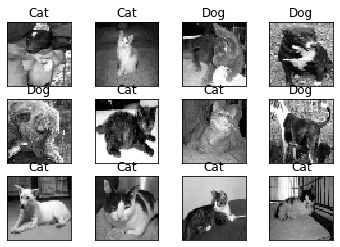

In [17]:
import matplotlib.pyplot as plt
test_data=process_test_data()
fig= plt.figure()
for num,data in enumerate(test_data[:12]):
    img_num=data[1]
    img_data=data[0]

    y=fig.add_subplot(3,4,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out=model.predict([data])[0]
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()